# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("EnergyEfficiency.csv")

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


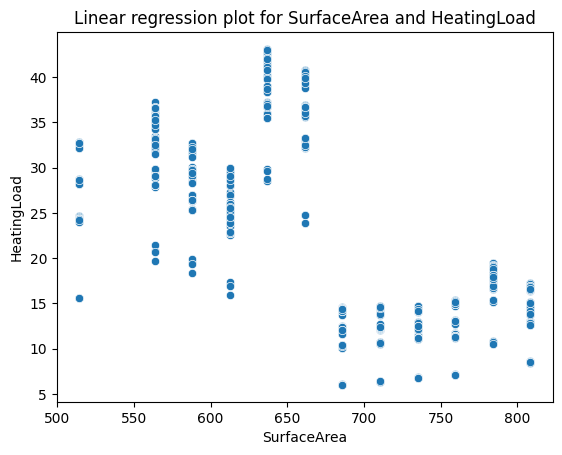

In [3]:
# 1
sns.scatterplot(data = data, x = "SurfaceArea", y="HeatingLoad")
plt.title("Linear regression plot for SurfaceArea and HeatingLoad")
plt.show()

# 2
The scatterplot with a regression line shows a negative relationship between SurfaceArea and HeatingLoad. The downward slope of the line suggests that as SurfaceArea increases, HeatingLoad tends to decrease. This relationship appears to be statistically significant, as the fitted line aligns with the data points and follows a clear trend.

# 3 
Yes, the correlation between SurfaceArea and HeatingLoad is surprising. The result suggests that larger buildings require less heating load, which seems counterintuitive. Typically, one would expect bigger buildings to need more energy for heating.

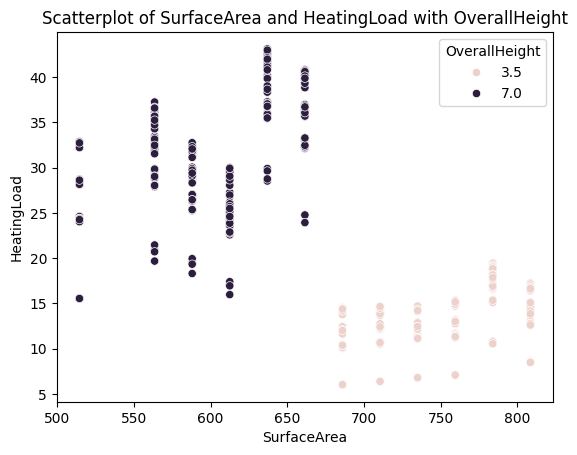

In [4]:
sns.scatterplot(data = data, x = "SurfaceArea", y = "HeatingLoad", hue = "OverallHeight")
plt.title("Scatterplot of SurfaceArea and HeatingLoad with OverallHeight")
plt.show()


Looking at the results, with hue = OverallHeight, it makes more sense now. The plot reveals that buildings with larger surface areas tend to have lower ceiling heights. As a result, these buildings have a smaller total volume, which reduces the amount of energy required for heating. This observation clarifies the previously surprising correlation — the reduced heating load is not simply due to a larger surface area but rather the combination of surface area and building height.

In [5]:
# 4
import statsmodels.api as sm

X = data["SurfaceArea"]
y = data["HeatingLoad"]
X = sm.add_constant(X)

In [6]:
linreg_model = sm.OLS(y, X).fit()
linreg_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        15:30:24   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared = 0.433
Dette betyder, at 43.3% af variationen i HeatingLoad kan forklares af SurfaceArea.

P-værdien for SurfaceArea = 0.000
Denne værdi er meget mindre end 0.05, hvilket betyder, at sammenhængen mellem SurfaceArea og HeatingLoad er statistisk signifikant.

SurfaceArea coef = -0.0754
Den negative værdi betyder, at der er en negativ korrelation. Når SurfaceArea stiger, falder HeatingLoad.

konklussion
Der er en moderat negativ korrelation mellem SurfaceArea og HeatingLoad.
Denne korrelation er statistisk signifikant (p < 0.05).
En øget SurfaceArea er forbundet med en reduceret HeatingLoad.

#5
According to the regression model, for each increase of 1 unit in SurfaceArea, the HeatingLoad is expected to decrease by approximately 0.0754 units. This negative relationship aligns with the observation that larger buildings in the dataset tend to have lower heights, reducing the heating demand.

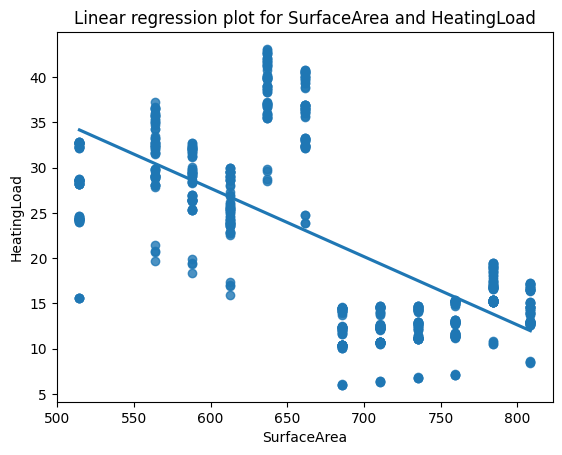

In [7]:
#6
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot med regressionslinje
sns.regplot(data = data, x = "SurfaceArea", y = "HeatingLoad", ci=None)
plt.title("Linear regression plot for SurfaceArea and HeatingLoad")
plt.show()


In [8]:
# R-squared (R²): Measures how well the model explains the variation in the dependent variable.
linreg_model.rsquared


0.43312223289382823

In [9]:
# Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values.
np.mean(np.abs(linreg_model.resid))


6.002338517195692

In [10]:
# Root Mean Squared Error (RMSE): Measure model error in the same unit as the original variable.
np.sqrt(np.mean(linreg_model.resid**2))


7.592090475900786


**R-squared (R²): 0.433**
This means the model explains 43.3% of the variation in HeatingLoad using SurfaceArea. This is not very strong but shows some correlation.

**MAE (Mean Absolute Error): 6.00**
On average, the model's predictions are about 6 units away from the actual values.

**RMSE (Root Mean Squared Error): 7.59**
This means the typical error in the model's predictions is around 7.59 units.

**Conclusion**
The model isn't very strong since R² is quite low, and the errors are noticeable. 

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

In [11]:
# 1
# Choose SurfaceArea plus two other variables as features. 
X = data[["SurfaceArea", "OverallHeight", "WallArea"]]
y = data["HeatingLoad"]
# Add constant
X = sm.add_constant(X)
# Fit the model with the selected features.
linreg_model = sm.OLS(y, X).fit()
# Display the summary
linreg_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1318.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.83e-301
Time:                        15:30:24   Log-Likelihood:                -2165.4
No. Observations:                 768   AIC:                             4339.
Df Residuals:                     764   BIC:                             4357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -28.8277      4.540     -6.350      0.000     -37.740     -19.916
SurfaceArea       0.0154      0.007      2.195      0.028       0.002       0.029
OverallHeight     5.5304      0.360     15.350      0.000       4.823       6.238
WallArea          0.0369      0.008      4.880      0.000       0.022       0.052
==============================================================================
Omnibus:                       35.991   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.060
Skew:                          -0.384   Prob(JB):                     1.11e-12
Kurtosis:                       4.063   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2

**R-squared (R²):**
Simple Linear Regression: 0.433
Multiple Linear Regression: 0.838

The R² value has significantly improved, meaning the new model explains 83.8% of the variation in HeatingLoad, compared to 43.3% in the previous model. This indicates a much better fit.

**P-values:**
All the selected features (SurfaceArea, OverallHeight, and WallArea) have p-values < 0.05, meaning they are statistically significant and contribute meaningfully to the model.

**coefficients:**
SurfaceArea = 0.0154: A small positive impact on HeatingLoad.
OverallHeight = 5.5304: A stronger positive impact, suggesting that taller buildings require significantly more heating.
WallArea = 0.0369: A moderate positive impact on HeatingLoad.
The coefficients align well with our expectations — larger surface area, taller buildings, and greater wall area all contribute to higher heating requirements.

In [12]:
# 3 Check each of the assumptions/problems for linear regression.



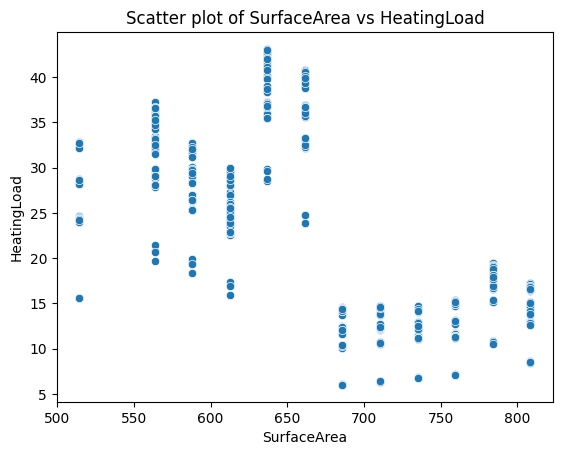

In [ ]:
# Linearity Check
sns.scatterplot(data=data, x="SurfaceArea", y="HeatingLoad")
plt.title("Scatter plot of SurfaceArea vs HeatingLoad")
plt.show()


The scatter plot shows a downward trend, indicating a negative correlation. However, the points are somewhat scattered and don't form a perfectly straight line.
The relationship appears to follow a downward linear trend, but there is some noise, meaning linear regression may not fully capture the pattern.

In [ ]:
# Correlation check
data["SurfaceArea"].corr(data["HeatingLoad"])


-0.6581202267776216

This indicates a moderate negative correlation between SurfaceArea and HeatingLoad.

In [15]:
from scipy import stats
stats.pearsonr(data["SurfaceArea"], data["HeatingLoad"])


PearsonRResult(statistic=-0.6581202267776218, pvalue=1.6869072902146838e-96)

P-value: 1.68e-96 (very close to zero)
This means the correlation is statistically significant.

 There is a statistically significant negative correlation, supporting the assumption that SurfaceArea and HeatingLoad are related.

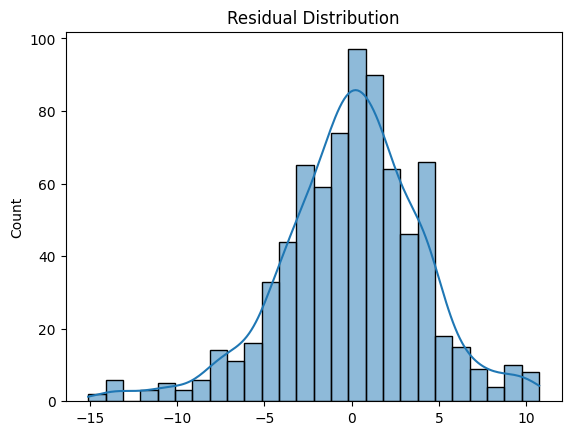

In [18]:
# Check for residuals
sns.histplot(linreg_model.resid, kde=True)
plt.title("Residual Distribution")
plt.show()


The residuals are approximately bell-shaped, resembling a normal distribution.
While not perfectly symmetrical, the distribution suggests that errors are somewhat normally distributed.
 The normality of residuals assumption is reasonably satisfied.

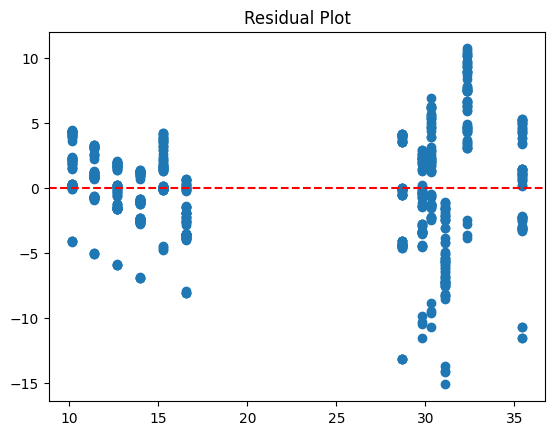

In [17]:
# Check for Homoscedasticity Constant Variance

plt.scatter(linreg_model.fittedvalues, linreg_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()


The residuals are unevenly spread.
The points should be randomly scattered around the red line (mean zero) without clear patterns or increasing variance. There is some visible pattern and increasing spread.
